# Introduction/Project Overview:

In this notebook, I will present my solution and analysis of the California Housing Prices dataset. This dataset can be found on [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices). The dataset contains data from the California 1990 census. The goal of this is to be able create a model to predict a numerical value for a house given some of its characteristics. For example if we are given houses and their features we should be able to put that through some sort of modle and get back a number that represents the price. This means that this is a regression task. Throughout this notebook I will visualize the data, explain some data preprocessing techniques, construct and evaluate models and analyze the results.

### Data Exploration & Preprocessing:
I will go over the dataset, analyzing its various features, checking for missing values, and gaining insights into the distribution of variables. Prior to building the models, I will preprocess the data by handling missing values, encoding categorical variables, and scaling numerical features to ensure good model performance. As well as visualize to see if we can recognize any patterns in the dataset that can help us. 

### Model Building & Evaluation:
In this notebook I will try implement a couple of models to try and accurately predict the value of a given house. This is a supervised learning task as we are given the labels (housing prices). For this project the models I have multiple linear regression, polynomial regression and a neural network. 

### Conclusion:
Finally, I will interpret the results of the models and discussing potential areas for model improvement. This dataset is a good challange to test my knowledge. This will serve as a good test for me to keep learning and testing my skills.

# Data Exploration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# load data into dataframe
data = pd.read_csv('housing.csv')

In [3]:
# check the first few entries in the data
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# get some basic info on data such as data types and count
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


We have nine numerical columns and one categorical column with `ocean_proximity`. There is also some missing values that we can see in the `total_bedrooms` column. We can look into filling them in but first lets go over the coulmns as they all the columns seem pretty important. I hvae taken this text from the kaggle site for thsi dataset that explains what they represent. 

`longitude:` A measure of how far west a house is; a higher value is farther west

`latitude:` A measure of how far north a house is; a higher value is farther north

`housingMedianAge:` Median age of a house within a block; a lower number is a newer building

`totalRooms:` Total number of rooms within a block

`totalBedrooms:` Total number of bedrooms within a block

`population:` Total number of people residing within a block

`households:` Total number of households, a group of people residing within a home unit, for a block

`medianIncome:` Median income for households within a block of houses (measured in tens of thousands of US Dollars)

`medianHouseValue:` Median house value for households within a block (measured in US Dollars)

`oceanProximity:` Location of the house w.r.t ocean/sea

So the data we have is not on specific houses but houses within a block. Now that we know what our data consists of and what each column represents, lets explore and visualize some of it. The min number of people within a block (popiulation) is 3. This could be an isolate region or just a big house. 

Below we see are given a lot info about our data. For example the average median age of a building in a block is `28.663`. That means that on average the median age of a building on a black is 28.63 years. The min median age of a building is 1 year while the max is 52 years. We also get information on the median house value. For example on the lower 25% the median house value is `119500`. While the upper 75% is `264700`. 

In [29]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Now lets get some information on the data with respect to the categorical column. 

In [31]:
pd.pivot_table(data, index = 'ocean_proximity', values = ['housing_median_age','total_rooms','total_bedrooms','population', 'households', 'median_income', 'median_house_value'])

,households,housing_median_age,median_house_value,median_income,population,total_bedrooms,total_rooms
ocean_proximity,,,,,,,
<1H OCEAN,517.419083,29.277397,240267.990812,4.231101,1518.440447,546.539185,2627.233451
INLAND,478.006927,24.262623,124896.863147,3.210359,1392.411484,533.881619,2721.252925
ISLAND,276.600000,42.400000,380440.000000,2.744420,668.000000,420.400000,1574.600000
NEAR BAY,487.236123,37.756388,259279.292070,4.175647,1227.881057,514.182819,2490.335242
NEAR OCEAN,501.528919,29.314688,249042.355023,4.006374,1355.637367,538.615677,2587.165525


Lets go over some things that stick out. First we see that there is less households on islands which makes sene as there is limited space. The average median house value is also also the highest at `380440` which means people have money to build and have privacy on that island. Additionally the average total rooms on islands is the smallest of all that could be again because there is less buildings. The age for island is also the largest this could be because most people living on an island are retired similiarly the median income is pretty low along with population. 

Lastly `Near Bay`, `Near Ocean` and `1H Ocean` have somewhat similar everages to `Inland` in comparison to `Island`. The major differneces are average `median_house_value` which `Inland` as the lowest. `Inland` also has second lowest average `median_income`. This seems pretty obvious because most jobs/high paying jobs are going to be in cities like Los Angeles and San Francisco. 

Moving on now lets try and graphing some of our data. Our first graph will be the longitude and latitude. Since we have these values graphing the could give us a map of california. 

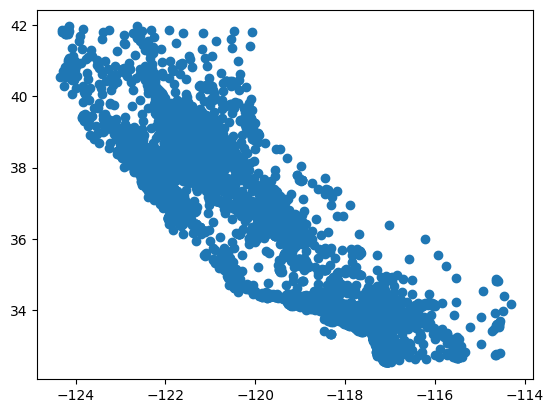

In [32]:
plt.scatter(data.longitude, data.latitude)
plt.show()

After graphing the longitude and latitude we get a graph that looks like California as expected. From the information we got earlier we can get houses `median_house_value` in the lower 25%. We can do this for 75% and the in between. Using this information we could draw a sort of heatmap of where more expensive houses are.

In [33]:
lower =  data.loc[data['median_house_value'] < 119500] # using 25 percentile for median house hold value
mid = data.loc[data['median_house_value'] >= 119500]  
mid = mid.loc[data['median_house_value'] <= 264700]  # in between 25 and 75
upper = data.loc[data['median_house_value'] > 264700] # using 75 percentile for median house hold value

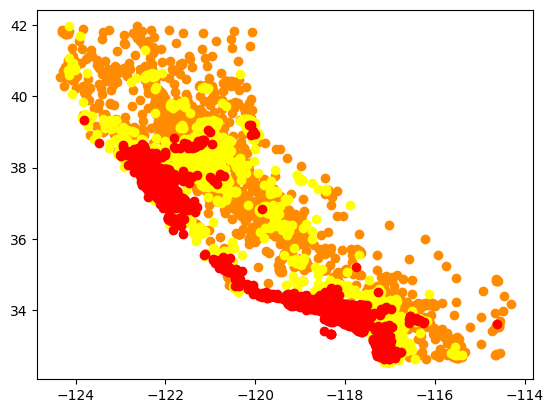

In [28]:
plt.scatter(lower.longitude, lower.latitude, c='darkorange')
plt.scatter(mid.longitude, mid.latitude, c='yellow')
plt.scatter(upper.longitude, upper.latitude, c='red')
plt.show()

In [ ]:
plt.scatter(data.total_rooms, data.median_house_value, c='b')
plt.show()